In [1]:
import csv
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
pwd

'C:\\Users\\Smokey\\Desktop\\2020_gitclass\\NBA data'

In [3]:
season = os.path.join("..","NBA data", "Seasons_Stats_complete.csv")
salary = os.path.join("..","NBA data", "NBA1 (1).csv")
s2018 = os.path.join("..","NBA data", "2018s.csv")

In [4]:
season_df = pd.read_csv(season)
season_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950,Curly Armstrong,G-F,31,FTW,63,0,0.0,0.368,...,0.705,0,0,0,176,0,0,0,217,458
1,1,1950,Cliff Barker,SG,29,INO,49,0,0.0,0.435,...,0.708,0,0,0,109,0,0,0,99,279
2,2,1950,Leo Barnhorst,SF,25,CHS,67,0,0.0,0.394,...,0.698,0,0,0,140,0,0,0,192,438
3,3,1950,Ed Bartels,F,24,TOT,15,0,0.0,0.312,...,0.559,0,0,0,20,0,0,0,29,63
4,4,1950,Ed Bartels,F,24,DNN,13,0,0.0,0.308,...,0.548,0,0,0,20,0,0,0,27,59


In [5]:
pts_per = season_df['PTS']/season_df["G"]
reb_per = season_df['TRB']/season_df["G"]
ast_per = season_df['AST']/season_df["G"]
season_df["Pts Per Game"] = pts_per
season_df["Reb Per Game"] = reb_per
season_df["Ast Per Game"] = ast_per
season_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Pts Per Game,Reb Per Game,Ast Per Game
0,0,1950,Curly Armstrong,G-F,31,FTW,63,0,0.0,0.368,...,0,176,0,0,0,217,458,7.269841,0.000000,2.793651
1,1,1950,Cliff Barker,SG,29,INO,49,0,0.0,0.435,...,0,109,0,0,0,99,279,5.693878,0.000000,2.224490
2,2,1950,Leo Barnhorst,SF,25,CHS,67,0,0.0,0.394,...,0,140,0,0,0,192,438,6.537313,0.000000,2.089552
3,3,1950,Ed Bartels,F,24,TOT,15,0,0.0,0.312,...,0,20,0,0,0,29,63,4.200000,0.000000,1.333333
4,4,1950,Ed Bartels,F,24,DNN,13,0,0.0,0.308,...,0,20,0,0,0,27,59,4.538462,0.000000,1.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,703,2019,Tyler Zeller,C,29,MEM,4,82,19.4,0.640,...,18,3,1,3,4,16,46,11.500000,4.500000,0.750000
26059,704,2019,Ante Žižić,C,22,CLE,59,1082,16.2,0.590,...,320,53,13,22,61,113,459,7.779661,5.423729,0.898305
26060,705,2019,Ivica Zubac,C,21,TOT,59,1040,18.9,0.604,...,362,63,14,51,70,137,525,8.898305,6.135593,1.067797
26061,706,2019,Ivica Zubac,C,21,LAL,33,516,19.5,0.633,...,162,25,4,27,33,73,281,8.515152,4.909091,0.757576


In [6]:
season_filt = season_df[["Year", "Player", "Pts Per Game","Reb Per Game", "Ast Per Game", "PER"]]
season_filt.head(10)

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,PER
0,1950,Curly Armstrong,7.269841,0.0,2.793651,0.0
1,1950,Cliff Barker,5.693878,0.0,2.224490,0.0
2,1950,Leo Barnhorst,6.537313,0.0,2.089552,0.0
3,1950,Ed Bartels,4.200000,0.0,1.333333,0.0
4,1950,Ed Bartels,4.538462,0.0,1.538462,0.0
5,1950,Ed Bartels,2.000000,0.0,0.000000,0.0
6,1950,Ralph Beard,14.916667,0.0,3.883333,0.0
7,1950,Gene Berce,3.333333,0.0,0.666667,0.0
8,1950,Charlie Black,10.169231,0.0,2.507692,0.0
9,1950,Charlie Black,10.611111,0.0,2.083333,0.0


In [8]:
merge_df = pd.merge(season_filt, salary_df, on="Player")
merge_df.head()

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,PER,Contract year,Avg Annual,Prior Pts,Prior Reb,Prior Ast,After Pts,After Reb,After Ast
0,2004,Carmelo Anthony,21.036585,6.073171,2.768293,17.6,2017,"26,243,760",22.4,5.9,2.9,16.2,5.8,1.3
1,2005,Carmelo Anthony,20.773333,5.680000,2.586667,16.7,2017,"26,243,760",22.4,5.9,2.9,16.2,5.8,1.3
2,2006,Carmelo Anthony,26.525000,4.925000,2.700000,22.0,2017,"26,243,760",22.4,5.9,2.9,16.2,5.8,1.3
3,2007,Carmelo Anthony,28.938462,6.015385,3.830769,22.1,2017,"26,243,760",22.4,5.9,2.9,16.2,5.8,1.3
4,2008,Carmelo Anthony,25.688312,7.415584,3.363636,21.1,2017,"26,243,760",22.4,5.9,2.9,16.2,5.8,1.3


In [9]:
filt_merge = merge_df[["Year", "Player", "Pts Per Game", "Reb Per Game", "Ast Per Game","PER", "Contract year", "Avg Annual"]]
filt_merge.head()

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,PER,Contract year,Avg Annual
0,2004,Carmelo Anthony,21.036585,6.073171,2.768293,17.6,2017,"26,243,760"
1,2005,Carmelo Anthony,20.773333,5.680000,2.586667,16.7,2017,"26,243,760"
2,2006,Carmelo Anthony,26.525000,4.925000,2.700000,22.0,2017,"26,243,760"
3,2007,Carmelo Anthony,28.938462,6.015385,3.830769,22.1,2017,"26,243,760"
4,2008,Carmelo Anthony,25.688312,7.415584,3.363636,21.1,2017,"26,243,760"


In [10]:
reduced_df = filt_merge.loc[filt_merge["Year"] > 2014.0]
pd.options.display.float_format = "{:,.1f}".format
reduced_df.head()                           

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,PER,Contract year,Avg Annual
13,2015,Carmelo Anthony,24.1,6.6,3.0,21.5,2017,"26,243,760"
14,2016,Carmelo Anthony,21.8,7.7,4.2,20.3,2017,"26,243,760"
15,2017,Carmelo Anthony,22.4,5.9,2.9,17.9,2017,"26,243,760"
16,2018,Carmelo Anthony,16.2,5.8,1.3,12.7,2017,"26,243,760"
17,2019,Carmelo Anthony,13.4,5.4,0.5,10.9,2017,"26,243,760"


In [11]:
money = reduced_df.sort_values("Avg Annual", ascending=False)
money.head()

,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,PER,Contract year,Avg Annual
125,2019,Kevin Durant,26.0,6.4,5.9,24.2,2016,"41,063,925"
121,2015,Kevin Durant,25.4,6.6,4.1,27.6,2016,"41,063,925"
123,2017,Kevin Durant,25.1,8.3,4.8,27.6,2016,"41,063,925"
124,2018,Kevin Durant,26.4,6.8,5.4,26.0,2016,"41,063,925"
122,2016,Kevin Durant,28.2,8.2,5.0,28.2,2016,"41,063,925"


In [12]:
nba2k17 = reduced_df.loc[reduced_df["Year"] == 2017, :]
nba2k15 = reduced_df.loc[reduced_df["Year"] == 2015, :]
nba2k16 = reduced_df.loc[reduced_df["Year"] == 2016, :]
nba2k18 = reduced_df.loc[reduced_df["Year"] == 2018, :]
nba2k19 = reduced_df.loc[reduced_df["Year"] == 2019, :]


In [13]:
nba2k18.drop_duplicates(subset="Player", keep="first", inplace=True)
nba2k18.head()

C:\Users\Smokey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Player,Pts Per Game,Reb Per Game,Ast Per Game,PER,Contract year,Avg Annual
16,2018,Carmelo Anthony,16.2,5.8,1.3,12.7,2017,"26,243,760"
45,2018,LeBron James,27.5,8.6,9.1,28.6,2017,"33,285,709"
60,2018,Dwight Howard,16.6,12.5,1.3,20.5,2017,"23,500,500"
74,2018,Chris Paul,18.6,5.4,7.9,24.4,2017,"24,599,495"
87,2018,LaMarcus Aldridge,23.1,8.5,2.0,25.0,2017,"21,461,010"


([<matplotlib.patches.Wedge at 0x141c91fbf48>,
 [Text(-0.6069604411311755, -0.9173870627504231, '2017'),
  Text(1.019596003389483, 0.41282440561598754, '2016'),
  Text(-0.2945523839220819, 1.05982965288098, '2018')],
 [Text(-0.33106933152609574, -0.5003929433184126, '53.6%'),
  Text(0.5561432745760816, 0.22517694851781137, '27.2%'),
  Text(-0.16066493668477191, 0.5780889015714437, '19.1%')])

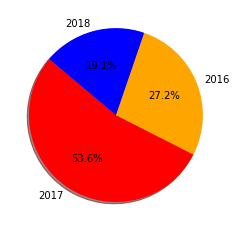

In [14]:
years = reduced_df["Contract year"].value_counts()
colors = ["red", "orange", "blue"]
labels = ["2017", "2016", "2018"]
plt.pie(years, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [18]:
nba2k15 = nba2k15.sort_values("Avg Annual")
nba2k16 = nba2k15.sort_values("Avg Annual")
nba2k17 = nba2k15.sort_values("Avg Annual")
nba2k18 = nba2k15.sort_values("Avg Annual")
nba2k19 = nba2k15.sort_values("Avg Annual")

In [ ]:
plt.scatter(nba2k16.iloc[:,5], nba2k16.iloc[:,7])
plt.ylabel('PER')
plt.xlabel('Avg Annual')
plt.ylim(12,None)
plt.xlim(10, 30)
plt.show()

In [ ]:
plt.scatter(nba2k17.iloc[:,2], nba2k17.iloc[:,6])
plt.ylabel('Average Salary')
plt.xlabel('Pts Per Game')
plt.ylim([12,None])
plt.xlim(10, 30)
plt.show()

In [ ]:
plt.scatter(nba2k18.iloc[:,2], nba2k18.iloc[:,6])
plt.ylabel('Average Salary')
plt.xlabel('Pts Per Game')
plt.ylim(12,None)
plt.xlim(10, 30)
plt.show()